# Topographic relief maps with Cartopy

Examples of using Shuttle Radar Topography Mission (SRTM) data.

## Introduction ##

Load required imports, allow inline graphics

In [1]:
import cartopy.crs as ccrs
import cartopy.io as cio
import cartopy.io.srtm as cis
from cartopy.io.srtm import SRTM3Source
from cartopy.io.srtm import SRTM1Source
from cartopy.io.srtm import SRTMDownloader

import matplotlib.pyplot as plt
import matplotlib.colors

import numpy as np

import os

D:\Anaconda3\envs\root36\lib\site-packages\cartopy\io\srtm.py:416: UserWarning: SRTM requires an account set up and log in to access.use of this class is likely to fail with HTTP 401 errors.
  warnings.warn('SRTM requires an account set up and log in to access.'


In [2]:
%matplotlib inline

------------------------------------
## Define SRTM Data Loader

The default SRTM data repository now requires authentication before allowimng downloads,
and the NASA URL appears to be changed, compared to that used by default in Cartopy

We define our own Loader class, accessing a ESA URL.

In [3]:
class MySRTMDownloader(SRTMDownloader):
        _SRTM_BASE_URL = ('http://step.esa.int/auxdata/dem/SRTMGL1/')
        
        def url(self, format_dict):
            # override the url method, looking up the url from the
            # ``SRTMDownloader._SRTM_LOOKUP_MASK`` array
            lat = int(format_dict['y'][1:])
            # Change to co-latitude.
            if format_dict['y'][0] == 'N':
                colat = 90 - lat
            else:
                colat = 90 + lat

            lon = int(format_dict['x'][1:4])
            # Ensure positive.
            if format_dict['x'][0] == 'W':
                lon = 360 - lon

            if SRTMDownloader._SRTM_LOOKUP_MASK[lon, colat]:
                return (MySRTMDownloader._SRTM_BASE_URL +
                        u'{y}{x}.SRTMGL{resolution}.hgt.zip').format(**format_dict)
            else:
                return None
            #end if
        #end url
#end MySRTMDownloader

### Example of loading SRTM data, and displaying via Cartopy and imshow

The image shows a problem, in that the terrain color map is linearly applied to our
height field, so the blue does not end at 0, but somewhere up the mountains.
Note the spurious message. Not overridden in our class, but maybe could be

D:\Anaconda3\envs\root36\lib\site-packages\cartopy\io\srtm.py:416: UserWarning: SRTM requires an account set up and log in to access.use of this class is likely to fail with HTTP 401 errors.
  warnings.warn('SRTM requires an account set up and log in to access.'


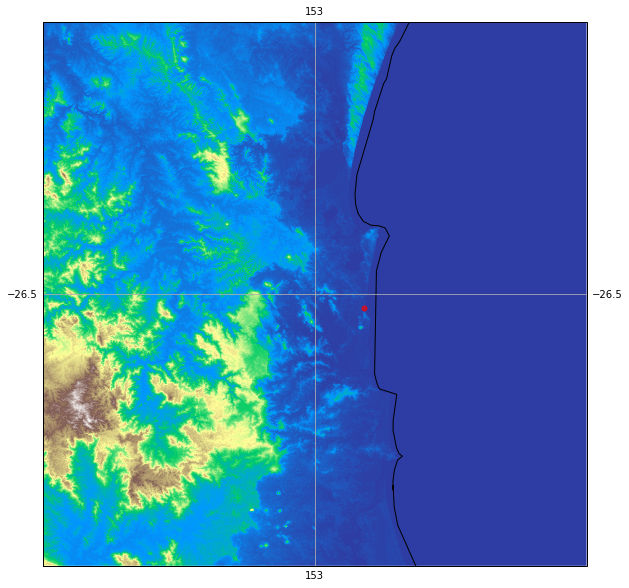

In [4]:

# the following variables define temporary and archive file file paths
default_spec = ('SRTM', 'SRTMGL{resolution}', '{y}{x}.hgt')
target_path_template = os.path.join('{config[data_dir]}',
                                    *default_spec)
pre_path_template = os.path.join('{config[pre_existing_data_dir]}',
                                 *default_spec)

# create a source of SRTM data, using our custom downloader
source = SRTM1Source(downloader=MySRTMDownloader(target_path_template, pre_path_template)  ) 

# create a figure of moderate size, declare we are using PlateCarree projection,
# add the SRTM data source, set the color map used, and the extent (in SE Qld)
fig = plt.figure(figsize=(10,10))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.add_raster(source, cmap='terrain')
ax.set_extent([152.5, 153.5, -27, -26])

# add a marker for home
home_lat, home_lon = -26.5258277,153.0912987
# Add a marker for home
plt.plot(home_lon, home_lat, marker='o', color='red', markersize=5,
         alpha=0.7, transform=ccrs.Geodetic(), zorder=5)

ax.coastlines(resolution='10m',)
ax.gridlines(draw_labels=True, xlocs=[152, 152.5, 153, 153.5, 154], ylocs=[-27, -26.5, -26, -25.5, -25])

plt.show()

In [5]:

plt.cm.terrain([0,0.1,0.2,0.4,0.4,0.5,0.6,0.7])

array([[0.2       , 0.2       , 0.6       , 1.        ],
       [0.06928105, 0.46143791, 0.86143791, 1.        ],
       [0.        , 0.7       , 0.7       , 1.        ],
       [0.6       , 0.92      , 0.52      , 1.        ],
       [0.6       , 0.92      , 0.52      , 1.        ],
       [0.99607843, 0.99498039, 0.59788235, 1.        ],
       [0.8       , 0.744     , 0.492     , 1.        ],
       [0.59607843, 0.48298039, 0.38188235, 1.        ]])

In [6]:
a = (plt.cm.get_cmap('terrain')._segmentdata)

In [7]:
a?

Type:        dict
String form: {'red': [(0.0, 0.2, 0.2), (0.15, 0.0, 0.0), (0.25, 0.0, 0.0), (0.5, 1.0, 1.0), (0.75, 0.5, 0.5),  <...> .0)], 'alpha': [(0.0, 1, 1), (0.15, 1, 1), (0.25, 1, 1), (0.5, 1, 1), (0.75, 1, 1), (1.0, 1, 1)]}
Length:      4
Docstring:  
dict() -> new empty dictionary
dict(mapping) -> new dictionary initialized from a mapping object's
    (key, value) pairs
dict(iterable) -> new dictionary initialized as if via:
    d = {}
    for k, v in iterable:
        d[k] = v
dict(**kwargs) -> new dictionary initialized with the name=value pairs
    in the keyword argument list.  For example:  dict(one=1, two=2)


In [8]:
len(a['red'])

6

In [9]:
a

{'alpha': [(0.0, 1, 1),
  (0.15, 1, 1),
  (0.25, 1, 1),
  (0.5, 1, 1),
  (0.75, 1, 1),
  (1.0, 1, 1)],
 'blue': [(0.0, 0.6, 0.6),
  (0.15, 1.0, 1.0),
  (0.25, 0.4, 0.4),
  (0.5, 0.6, 0.6),
  (0.75, 0.33, 0.33),
  (1.0, 1.0, 1.0)],
 'green': [(0.0, 0.2, 0.2),
  (0.15, 0.6, 0.6),
  (0.25, 0.8, 0.8),
  (0.5, 1.0, 1.0),
  (0.75, 0.36, 0.36),
  (1.0, 1.0, 1.0)],
 'red': [(0.0, 0.2, 0.2),
  (0.15, 0.0, 0.0),
  (0.25, 0.0, 0.0),
  (0.5, 1.0, 1.0),
  (0.75, 0.5, 0.5),
  (1.0, 1.0, 1.0)]}

In [10]:
[print(a,b,g,r, '\n') for a,b,g,r in zip(a['alpha'], a['blue'], a['green'], a['red'])]

(0.0, 1, 1) (0.0, 0.6, 0.6) (0.0, 0.2, 0.2) (0.0, 0.2, 0.2) 

(0.15, 1, 1) (0.15, 1.0, 1.0) (0.15, 0.6, 0.6) (0.15, 0.0, 0.0) 

(0.25, 1, 1) (0.25, 0.4, 0.4) (0.25, 0.8, 0.8) (0.25, 0.0, 0.0) 

(0.5, 1, 1) (0.5, 0.6, 0.6) (0.5, 1.0, 1.0) (0.5, 1.0, 1.0) 

(0.75, 1, 1) (0.75, 0.33, 0.33) (0.75, 0.36, 0.36) (0.75, 0.5, 0.5) 

(1.0, 1, 1) (1.0, 1.0, 1.0) (1.0, 1.0, 1.0) (1.0, 1.0, 1.0) 



[None, None, None, None, None, None]

## Create testbed for colormapping normalization

Note that only the first 10 values are -ve; only these we desire to be blue

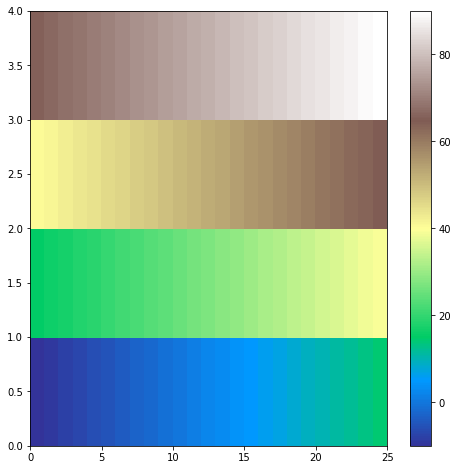

In [11]:
# create array with values from 0 to 99, in 4 rows of 25 values, and display with terrain colormap

arr = np.linspace(0, 100, 100).reshape((4, 25))

# create some -ve values
arr = arr - 10

fig = plt.figure(figsize=(8,8))
my_cmap = plt.cm.get_cmap('terrain')

mapable = plt.pcolor(arr,  cmap=my_cmap)

fig.colorbar(mapable,)

plt.show()



--------------------------------------------------
### Create our midpoint normalization class

This maps all -ve values to the range 0 to 0.25, (ie under water == blue )


In [12]:
class MidpointNormalize(matplotlib.colors.Normalize):
    def __init__(self, vmin=None, vmax=None, midpoint=None, clip=False):
        self.midpoint = midpoint
        matplotlib.colors.Normalize.__init__(self, vmin, vmax, clip)
    # end __init__

    def __call__(self, value, clip=None):
        # I'm ignoring masked values and all kinds of edge cases to make a
        # simple example...
        x, y = [self.vmin, self.midpoint, self.vmax], [0, 0.22, 1]
        return np.ma.masked_array(np.interp(value, x, y))
    # end __call__
#end MidpointNormalize

### Apply custom Normalization

Now, only -ve value are coded as blue

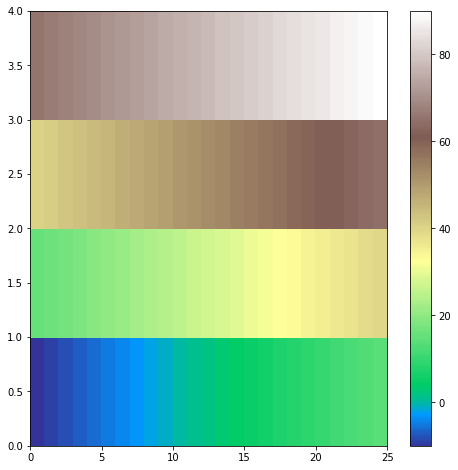

In [13]:
# create array with values from 0 to 99, in 4 rows of 25 values, and display with terrain colormap

arr = np.linspace(0, 100, 100).reshape((4, 25))

# create some -ve values
arr = arr - 10

fig = plt.figure(figsize=(8,8))
my_cmap = plt.cm.get_cmap('terrain')

mapable = plt.pcolor(arr,  cmap=my_cmap, norm=MidpointNormalize(midpoint=0.5))

fig.colorbar(mapable,)

plt.show()

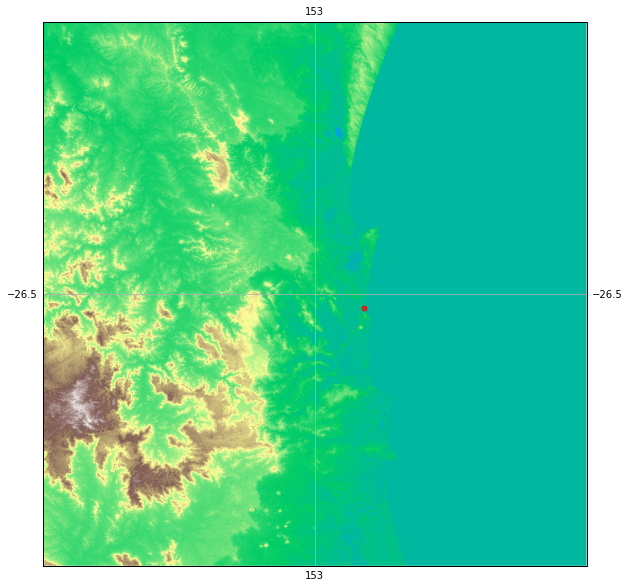

In [47]:
fig = plt.figure(figsize=(10,10))
ax = plt.axes(projection=ccrs.PlateCarree())

my_cmap = plt.cm.get_cmap('terrain')
ax.add_raster(source, cmap=my_cmap, norm=MidpointNormalize(midpoint=1, vmin=-27, vmax=884) )
#ax.add_raster(source, cmap=my_cmap, norm=matplotlib.colors.Normalize(vmin=-27, vmax=884) )

ax.set_extent([152.5, 153.5, -27, -26])


ax.gridlines(draw_labels=True, xlocs=[152, 152.5, 153, 153.5, 154], ylocs=[-27, -26.5, -26, -25.5, -25])


home_lat, home_lon = -26.5258277,153.0912987
# Add a marker for home
plt.plot(home_lon, home_lat, marker='o', color='red', markersize=5,
         alpha=0.7, transform=ccrs.Geodetic(), zorder=5)

plt.show()

## Create 'coastline' color map

In [15]:
def make_coast_cmap():
    # Combine the lower and upper range of the terrain colormap with a gap in the middle
    # to let the coastline appear more prominently.
    # inspired by https://stackoverflow.com/questions/31051488/combining-two-matplotlib-colormaps
    colors_undersea = plt.cm.terrain(np.linspace(0, 0.17, 56))
    colors_land = plt.cm.terrain(np.linspace(0.25, 1, 200))
    # combine them and build a new colormap
    colors = np.vstack((colors_undersea, colors_land))
    cut_terrain_map = matplotlib.colors.LinearSegmentedColormap.from_list('cut_terrain', colors)
    
    return cut_terrain_map
#end make_coast_cmap



### Test colormap with array -10 to 90

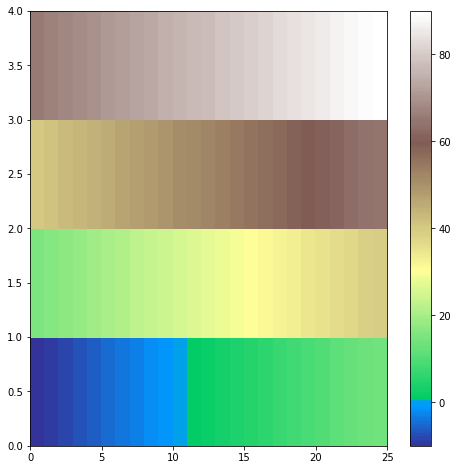

In [16]:
# create array with values from 0 to 99, in 4 rows of 25 values, and display with terrain colormap
arr = np.linspace(0, 100, 100).reshape((4, 25))

# create some -ve values
arr = arr - 10

coast_cmap = make_coast_cmap()

fig = plt.figure(figsize=(8,8))
my_cmap = plt.cm.get_cmap('terrain')

mapable = plt.pcolor(arr,  cmap=coast_cmap, norm=MidpointNormalize(midpoint=0.5))

fig.colorbar(mapable,)

plt.show()

## Test with SRTM data

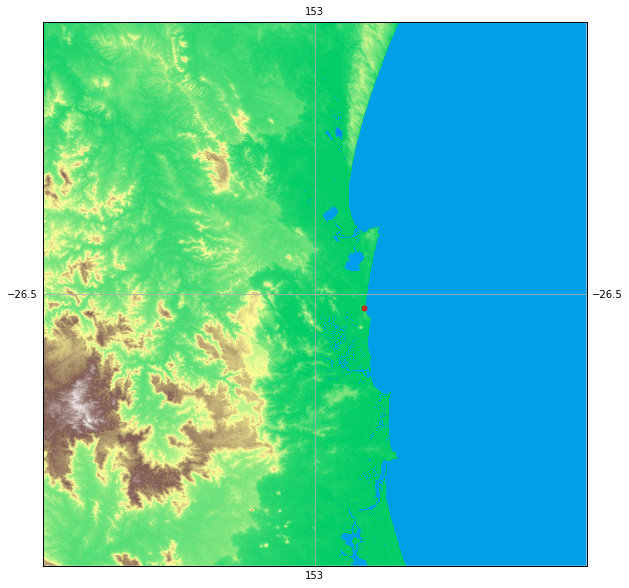

In [48]:
fig = plt.figure(figsize=(10,10))
ax = plt.axes(projection=ccrs.PlateCarree())

my_cmap = plt.cm.get_cmap('terrain')
ax.add_raster(source, cmap=coast_cmap, norm=MidpointNormalize(midpoint=0.9, vmin=-27, vmax=884) )
#ax.add_raster(source, cmap=my_cmap, norm=matplotlib.colors.Normalize(vmin=-27, vmax=884) )

ax.set_extent([152.5, 153.5, -27, -26])


ax.gridlines(draw_labels=True, xlocs=[152, 152.5, 153, 153.5, 154], ylocs=[-27, -26.5, -26, -25.5, -25])


home_lat, home_lon = -26.5258277,153.0912987
# Add a marker for home
plt.plot(home_lon, home_lat, marker='o', color='red', markersize=5,
         alpha=0.7, transform=ccrs.Geodetic(), zorder=5)

plt.show()

### Add Colorbar

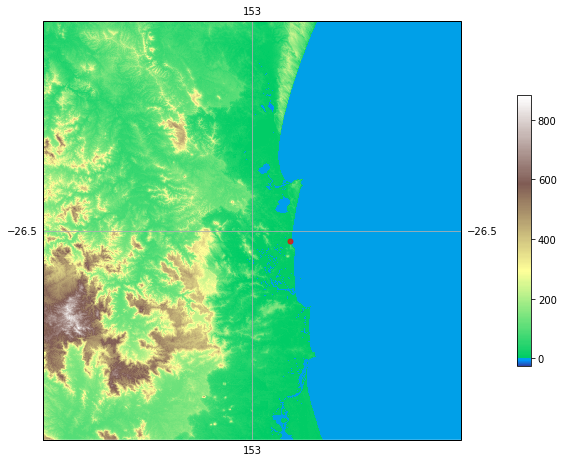

In [49]:
fig = plt.figure(figsize=(10,10))
ax = plt.axes(projection=ccrs.PlateCarree())

my_cmap = plt.cm.get_cmap('terrain')
ax.add_raster(source, cmap=coast_cmap, norm=MidpointNormalize(midpoint=0.9, vmin=-27, vmax=884) )


ax.set_extent([152.5, 153.5, -27, -26])

ax.gridlines(draw_labels=True, xlocs=[152, 152.5, 153, 153.5, 154], ylocs=[-27, -26.5, -26, -25.5, -25])


home_lat, home_lon = -26.5258277,153.0912987
# Add a marker for home
plt.plot(home_lon, home_lat, marker='o', color='red', markersize=5,
         alpha=0.7, transform=ccrs.Geodetic(), zorder=5)

sm = plt.cm.ScalarMappable(cmap=coast_cmap, norm=MidpointNormalize(midpoint=0.9, vmin=-27, vmax=884))
sm._A = []
plt.colorbar(sm, shrink=0.5, pad=.1)

plt.show()

----------------------------------
## Grey Scale hill shading ##

D:\Anaconda3\envs\root36\lib\site-packages\cartopy\io\srtm.py:416: UserWarning: SRTM requires an account set up and log in to access.use of this class is likely to fail with HTTP 401 errors.
  warnings.warn('SRTM requires an account set up and log in to access.'


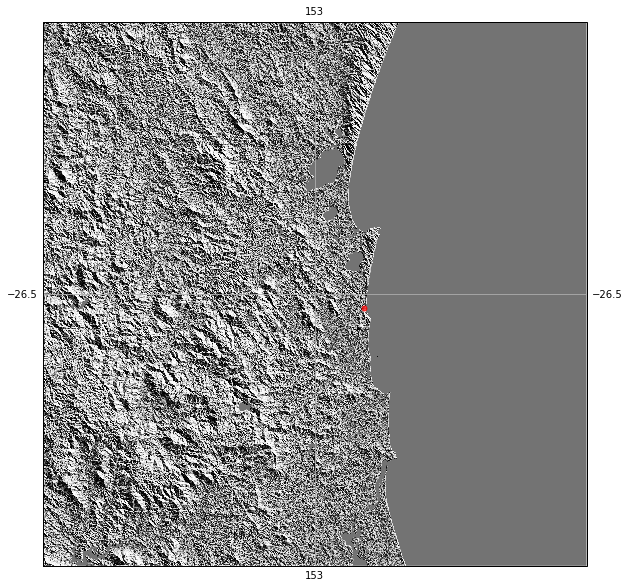

In [50]:
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
from cartopy.io.srtm import SRTM3Source
from cartopy.io.srtm import SRTM1Source
from cartopy.io.srtm import SRTMDownloader

from cartopy.io import PostprocessedRasterSource, LocatedImage
from cartopy.io import srtm

def shade(located_elevations):
    """
    Given an array of elevations in a LocatedImage, add a relief (shadows) to
    give a realistic 3d appearance.

    """
    new_img = srtm.add_shading(located_elevations.image,
                               azimuth=135, altitude=15)
    return LocatedImage(new_img, located_elevations.extent)

#end shade

class MySRTMDownloader(SRTMDownloader):
        _SRTM_BASE_URL = ('http://step.esa.int/auxdata/dem/SRTMGL1/')
        
        def url(self, format_dict):
            # override the url method, looking up the url from the
            # ``SRTMDownloader._SRTM_LOOKUP_MASK`` array
            lat = int(format_dict['y'][1:])
            # Change to co-latitude.
            if format_dict['y'][0] == 'N':
                colat = 90 - lat
            else:
                colat = 90 + lat

            lon = int(format_dict['x'][1:4])
            # Ensure positive.
            if format_dict['x'][0] == 'W':
                lon = 360 - lon

            if SRTMDownloader._SRTM_LOOKUP_MASK[lon, colat]:
                return (MySRTMDownloader._SRTM_BASE_URL +
                        u'{y}{x}.SRTMGL{resolution}.hgt.zip').format(**format_dict)
            else:
                return None
            #end if
        #end url
#end MySRTMDownloader

default_spec = ('SRTM', 'SRTMGL{resolution}', '{y}{x}.hgt')
target_path_template = os.path.join('{config[data_dir]}',
                                    *default_spec)
pre_path_template = os.path.join('{config[pre_existing_data_dir]}',
                                 *default_spec)

source = SRTM1Source(downloader=MySRTMDownloader(target_path_template, pre_path_template)  ) 

shaded_srtm = PostprocessedRasterSource(source, shade)

fig = plt.figure(figsize=(10,10))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.add_raster(shaded_srtm, cmap='Greys')
ax.set_extent([152.5, 153.5, -27, -26])

home_lat, home_lon = -26.5258277,153.0912987
# Add a marker for home
plt.plot(home_lon, home_lat, marker='o', color='red', markersize=5,
         alpha=0.7, transform=ccrs.Geodetic(), zorder=5)


ax.gridlines(draw_labels=True, xlocs=[152, 152.5, 153, 153.5, 154], ylocs=[-27, -26.5, -26, -25.5, -25])

plt.show()

-----------------------------------------------------
## Plotting elevation data ##

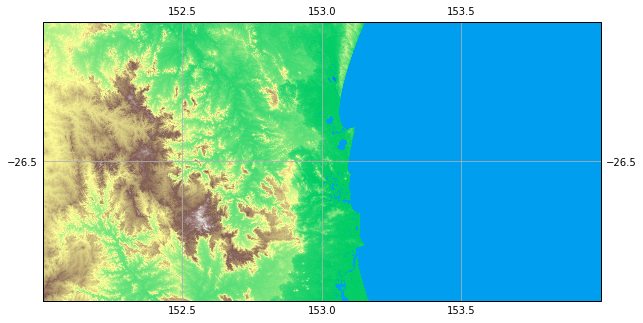

In [20]:
# get a two deg wide by 1 deg high chunk of data from our SRTM source

elev, crs, extent = source.combined(152, -27, 2, 1 )

# create figure, set projection to that used by our SRTM source, 
# display the elevation data as an image, using the coastal color map
# that emphasises the water land boundary

fig = plt.figure(figsize=(10,10))
ax = plt.axes(projection=crs)
ax.imshow(elev, transform=crs, cmap=coast_cmap, extent=extent,
          norm=MidpointNormalize(midpoint=0.9, vmin=-20, vmax=884))

# draw lat lon gridlines
ax.gridlines(draw_labels=True, xlocs=[152, 152.5, 153, 153.5, 154], ylocs=[-27, -26.5, -26, -25.5, -25])

As above, but with a bigger area, and a color bar legend

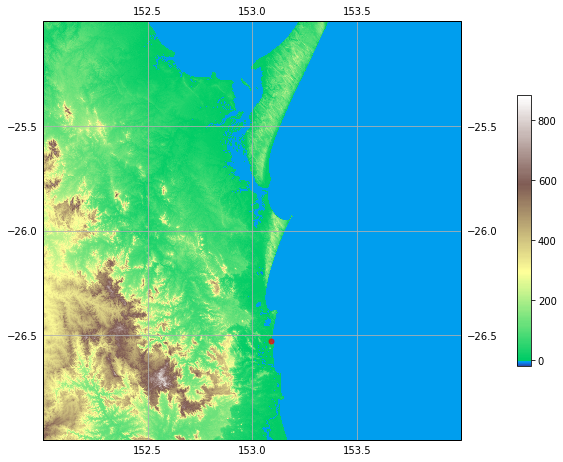

In [21]:
elev, crs, extent = source.combined(152, -27, 2, 2 )
fig = plt.figure(figsize=(10,10))
ax = plt.axes(projection=ccrs.PlateCarree(), )
mappable = ax.imshow(elev, transform=crs, cmap=coast_cmap, extent=[152, 154, -27, -25], 
          norm=MidpointNormalize(midpoint=0.9, vmin=-20, vmax=884))

home_lat, home_lon = -26.5258277,153.0912987

plt.plot(home_lon, home_lat, marker='o', color='red', markersize=5,
         alpha=0.7, transform=ccrs.Geodetic(), zorder=5)
ax.gridlines(draw_labels=True, xlocs=[152, 152.5, 153, 153.5, 154], ylocs=[-27, -26.5, -26, -25.5, -25])

fig.colorbar(mappable, pad=0.1, shrink=0.5)
plt.show()

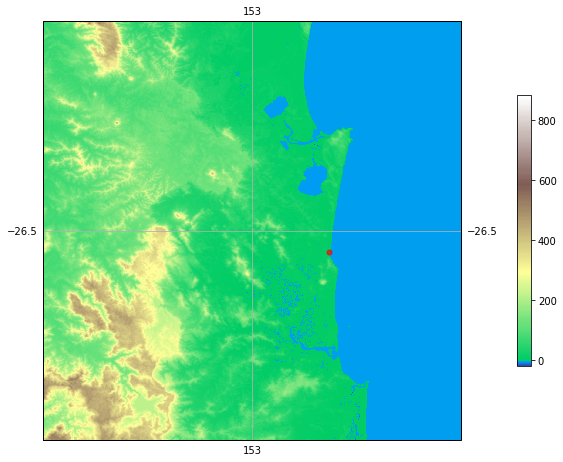

In [22]:
elev, crs, extent = source.combined(152, -27, 2, 2 )
fig = plt.figure(figsize=(10,10))
ax = plt.axes(projection=ccrs.PlateCarree(), )

ax.set_extent((152.75, 153.25, -26.75, -26.25,) )

mappable = ax.imshow(elev, transform=crs, cmap=coast_cmap, extent=extent, 
          norm=MidpointNormalize(midpoint=0.9, vmin=-20, vmax=884))

home_lat, home_lon = -26.5258277,153.0912987

plt.plot(home_lon, home_lat, marker='o', color='red', markersize=5,
         alpha=0.7, transform=ccrs.PlateCarree(), zorder=5)

ax.gridlines(draw_labels=True, xlocs=[152, 152.5, 153, 153.5, 154], ylocs=[-27, -26.5, -26, -25.5, -25])

fig.colorbar(mappable, pad=0.1, shrink=0.5)
plt.show()

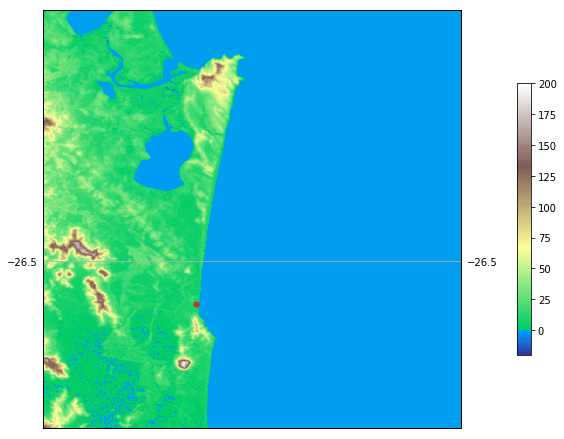

In [23]:
elev, crs, extent = source.combined(152, -27, 2, 2 )
fig = plt.figure(figsize=(10,10))
ax = plt.axes(projection=ccrs.PlateCarree(), )

ax.set_extent((153.00, 153.25, -26.60, -26.35,) )

mappable = ax.imshow(elev, transform=crs, cmap=coast_cmap, extent=extent, 
          norm=MidpointNormalize(midpoint=0.9, vmin=-20, vmax=200))

home_lat, home_lon = -26.5258277,153.0912987

plt.plot(home_lon, home_lat, marker='o', color='red', markersize=5,
         alpha=0.7, transform=ccrs.PlateCarree(), zorder=5)

ax.gridlines(draw_labels=True, xlocs=[152, 152.5, 153, 153.5, 154], ylocs=[-27, -26.5, -26, -25.5, -25])

fig.colorbar(mappable, pad=0.1, shrink=0.5)
plt.show()

-------------------------------------------
## Use of non-Cartopy-aware Axes

### First, use terrain color map, and custom contour levels to contour the elevation data

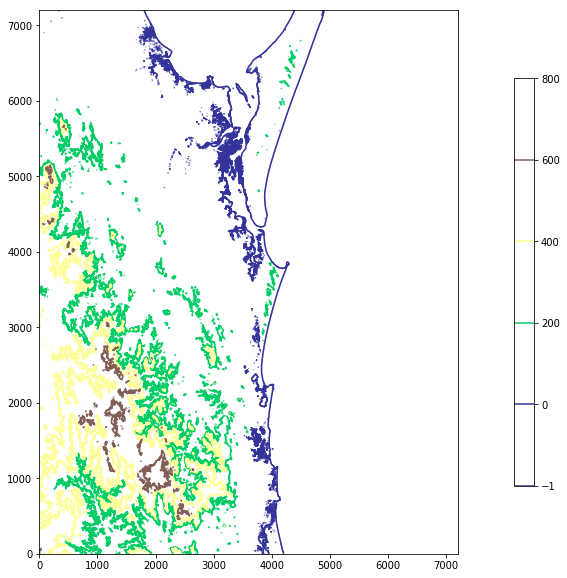

In [24]:
fig = plt.figure(figsize=(10,10))

cbm = plt.contour(elev, levels=[-1, 0, 200, 400, 600, 800], cmap='terrain', )

fig.colorbar(cbm, shrink=0.75, pad=0.1)

plt.show()

### Plot Elevation Data as Image Array

We use our custom color map, but because we are not normalizing the data, 
we don't get the sea level where it should be

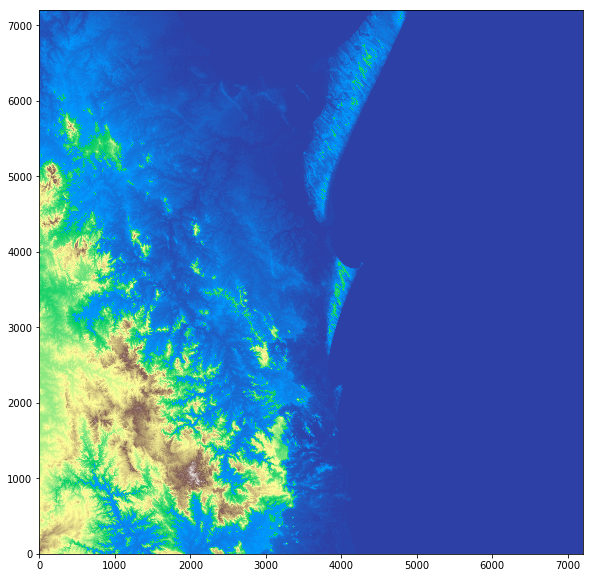

In [35]:
fig = plt.figure(figsize=(10,10))

cb = plt.imshow(elev, cmap=coast_cmap, origin='lower')

plt.show()

Fix this Fix coast line by our custom normalization

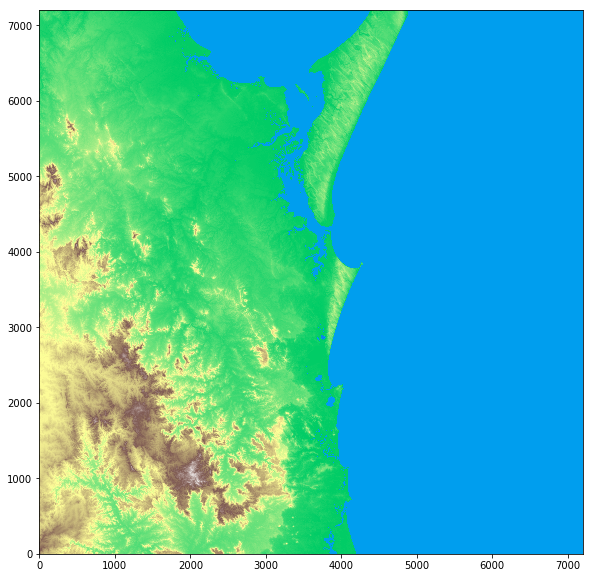

In [51]:
fig = plt.figure(figsize=(10,10))

cb = plt.imshow(elev, cmap=coast_cmap, origin='lower', norm=MidpointNormalize(midpoint=0.9, vmin=-20, vmax=900))

plt.show()

--------------------------------------------------
### Contour Fill our Elevation Data Array

First, just ignore coastline complications

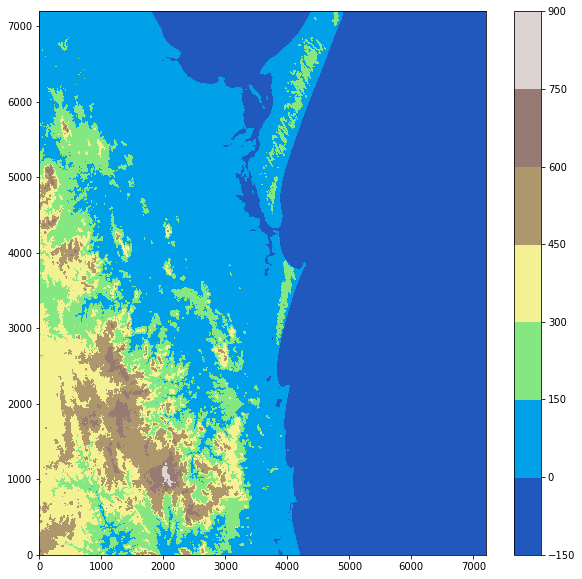

In [26]:
fig = plt.figure(figsize=(10,10))

cb = plt.contourf(elev,  cmap=coast_cmap ,)

fig.colorbar(cb)
plt.show()

### Adjust normalization so zero = blue

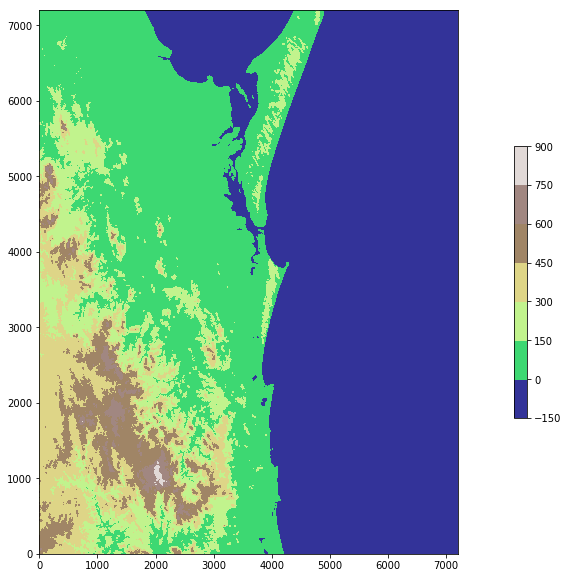

In [35]:
fig = plt.figure(figsize=(10,10))

cb = plt.contourf(elev,  cmap=coast_cmap, 
                  norm=MidpointNormalize(midpoint=0.9, vmin=-20, vmax=900))

# position colorbar more elegently
fig.colorbar(cb, shrink=0.5, pad=0.1)
plt.show()

Normalize color mapping to show coastline, add contours

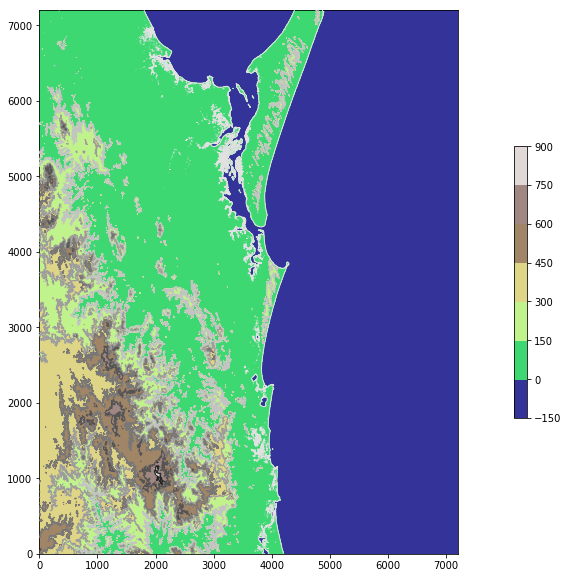

In [34]:
fig = plt.figure(figsize=(10,10))

cb = plt.contourf(elev,  cmap=coast_cmap, 
                  norm=MidpointNormalize(midpoint=0.9, vmin=-20, vmax=900))
cb2 = plt.contour(elev, 
                  norm=MidpointNormalize(midpoint=0.9, vmin=-20, vmax=900), zorder=10, linewidths=1, cmap='Greys')

# position colorbar more elegently
fig.colorbar(cb, shrink=0.5, pad=0.1)
plt.show()

---------------------------------------------
## Contouring on Cartopy-aware Axes

Use the default (cartopy?) color map

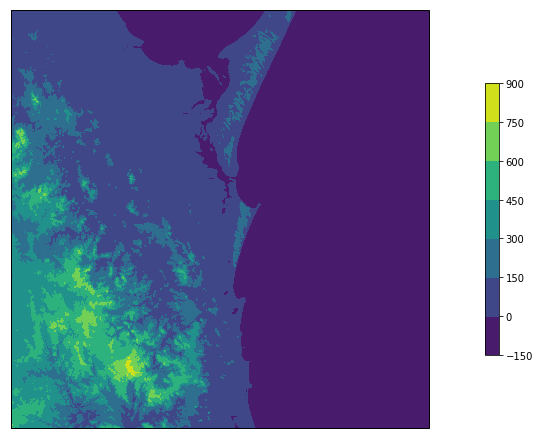

In [43]:
elev, crs, extent = source.combined(152, -27, 2, 2 )

nlats = elev.shape[1]

nlons = elev.shape[0]

lat_start = -27
lon_start = 152
lat_stop = -25
lon_stop = 154

lons = np.linspace(lon_start, lon_stop, num=nlons)
lats = np.linspace(lat_start, lat_stop, num=nlats)


fig = plt.figure(figsize=(10,10))
ax = plt.axes(projection=crs)

cb = plt.contourf(lons, lats, elev, transform=crs)

ax.gridlines()

# position colorbar more elegently
fig.colorbar(cb, shrink=0.5, pad=0.1)
plt.show()

Adjust for coastline color mapping

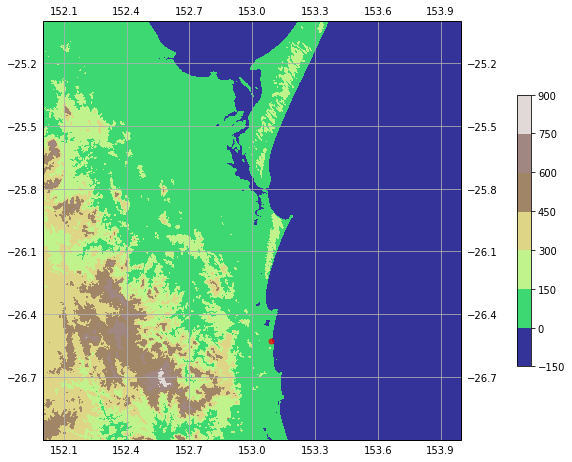

In [46]:
elev, crs, extent = source.combined(152, -27, 2, 2 )

# get numbers of lat and lon points in our elevation data
nlats = elev.shape[1]
nlons = elev.shape[0]

# get lat and lon start and stop value3s
lat_start = extent[2]
lon_start = extent[0]
lat_stop = extent[3]
lon_stop = extent[1]

# set up arrays to tell contourf where our elevation data is located
lons = np.linspace(lon_start, lon_stop, num=nlons)
lats = np.linspace(lat_start, lat_stop, num=nlats)

# plot the data as a set of filled contour
fig = plt.figure(figsize=(10,10))
ax = plt.axes(projection=crs)

cb = plt.contourf(lons, lats, elev, transform=crs, cmap=coast_cmap, 
                  norm=MidpointNormalize(midpoint=0.9, vmin=-20, vmax=900))

ax.gridlines(draw_labels=True)

# there is no place like home
home_lat, home_lon = -26.5258277,153.0912987
plt.plot(home_lon, home_lat, marker='o', color='red', markersize=5,
         alpha=0.7, transform=ccrs.PlateCarree(), zorder=5)

# position colorbar more elegently than default
fig.colorbar(cb, shrink=0.5, pad=0.1)
plt.show()

In [40]:
ccrs.PlateCarree?

Init signature: ccrs.PlateCarree(central_longitude=0.0, globe=None)
Docstring:     
The abstract class which denotes cylindrical projections where we
want to allow x values to wrap around.
Init docstring:
Parameters
----------
proj4_params: iterable of key-value pairs
    The proj4 parameters required to define the
    desired CRS.  The parameters should not describe
    the desired elliptic model, instead create an
    appropriate Globe instance. The ``proj4_params``
    parameters will override any parameters that the
    Globe defines.
globe: :class:`~cartopy.crs.Globe` instance, optional
    If omitted, the default Globe instance will be created.
    See :class:`~cartopy.crs.Globe` for details.
File:           d:\anaconda3\envs\root36\lib\site-packages\cartopy\crs.py
Type:           ABCMeta


In [ ]:
elev.max(), elev.min()

In [25]:
elev.shape



(7202, 7202)

In [ ]:
elev[0][1000:1010]

In [45]:
print(extent)

(152, 154, -27, -25)
